In [1]:
import pandas as pd
import os
import numpy as np
import datetime
import pickle

In [2]:
def list_files(filepath, filetype):
   paths = []
   for root, dirs, files in os.walk(filepath):
      for file in files:
         if file.lower().endswith(filetype.lower()):
            paths.append(os.path.join(root, file))
   return(paths)

## Check these paths
# headers_2019 = list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'raw_image_headers.csv')
# headers_2020 = list_files(r"Z:\Headers2020",'raw_image_headers.csv')
# headers_2021 = list_files(r"Z:\Headers2021",'raw_image_headers.csv')
# headers_2022 = list_files(r"Z:\Headers2022",'raw_image_headers.csv')
# headers_2023 = list_files(r"Z:\__Organized_Directories_InProgress\2023_UnpackedCollects",'raw_image_headers.csv')
# headers = headers_2019 + headers_2020 + headers_2021 + headers_2022 + headers_2023
# with open("headers.txt", "wb") as fp:   #Pickling
#     pickle.dump(headers, fp)
# print(len(headers))

In [3]:
## Headers list

with open("headers.txt", "rb") as fp:   # Unpickling
    headers = pickle.load(fp)
len(headers)

693

In [69]:
## creating a list of unpacked image names and paths

# images_2019 = list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'.png') + list_files(r"Z:\__Organized_Directories_InProgress\2019_UnpackedCollects",'.png')
# images_2020 = list_files(r"Z:\__Organized_Directories_InProgress\2020_UnpackedCollects",'.png')
# images_2021 = list_files(r"Z:\__Organized_Directories_InProgress\2021_UnpackedCollects",'.png')
# images_2022 = list_files(r"Z:\__Organized_Directories_InProgress\2022_UnpackedCollects",'.png')
# images_2023 = list_files(r"Z:\__Organized_Directories_InProgress\2023_UnpackedCollects",'.png')
# image_list = images_2019 + images_2020 + images_2021 + images_2022+ images_2023
# print(len(image_list)) # 1981816
# with open("image_list.txt", "wb") as fp:   #Pickling
#     pickle.dump(image_list, fp)


1981816


In [70]:
## Images List

with open("image_list.txt", "rb") as fp:   # Unpickling
    image_list = pickle.load(fp)
len(image_list) # 1981816

1981816

In [82]:
## Dataframe of all unpacked images and their paths
# df_imgs = pd.DataFrame(image_list, columns=["image_path"])
# im = lambda x: os.path.basename(x)
# df_imgs["image_name"] = df_imgs.image_path.map(im)
# df_imgs["image_name"] = df_imgs.image_path.map(im)
# df_imgs = df_imgs.drop_duplicates(subset="image_name")
# df_imgs.to_pickle("2019-2023/2019-2023_imgs.pickle")

df_imgs = pd.read_pickle("2019-2023/2019-2023_imgs.pickle")
print(df_imgs.shape) # (1948911, 2)
df_imgs.head()

(1948911, 2)


,image_path,image_name
0,Z:\__Organized_Directories_InProgress\2019_Unp...,charts.png
1,Z:\__Organized_Directories_InProgress\2019_Unp...,prescreen_charts.png
2,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00001536.png
3,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00003144.png
4,Z:\__Organized_Directories_InProgress\2019_Unp...,image_raw_00004751.png


In [83]:
df_imgs[df_imgs['image_path'].str.contains('.jpg')]

,image_path,image_name


In [8]:
def print_col_len(headers_paths):
    col_lens = []
    for path in headers_paths:
        length = len(pd.read_csv(path, header=0).columns)
        col_lens.append(length)
    return np.unique(np.array(col_lens), return_counts=True)
# print_col_len(headers)

In [88]:
columns_ = ["image_name", "Heading_D", "Pitch_D", "Roll_D", "Temp_C", "AUV_depth_m", "Alt_m", "Salinity_ppt", "Speed_kn", "Lat_DD", "Long_DD", "CreationTime", "EpochTime"]
# Created this dictionary to force similar column names into the same name, ie 'Latitude (decimal degrees)' --> 'Lat_DD'
header_dict = {'image_name': 'image_name', 'Unnamed: 0':'image_name','image_filename':'image_name',
                'Heading_D':'Heading_D' ,'Heading (degrees)':'Heading_D','INS Heading':'Heading_D',
                'Pitch_D':'Pitch_D','Pitch (degrees)':'Pitch_D', 'Pitch Angle':'Pitch_D',
                'Roll_D': 'Roll_D', 'Roll (degrees)': 'Roll_D','Roll Angle':'Roll_D',
                'Temp_C': 'Temp_C', 'Temperature (C)': 'Temp_C','Temperature (c)':'Temp_C',
                'AUV_depth_m':'AUV_depth_m', 'Depth (m)':'AUV_depth_m','DFS Depth(m)':'AUV_depth_m',
                'Alt_m' : 'Alt_m', 'Altitude (m)':'Alt_m','DTB Height(m)':'Alt_m',
                'Salinity_ppt': 'Salinity_ppt', 'Salinity (ppt)':'Salinity_ppt','Salinity (ppt)':'Salinity_ppt',
                'CreationTime':'CreationTime', 'Creation Time':'CreationTime',
                'EpochTime':'EpochTime',
                'Speed_kn':'Speed_kn', 'Speed (knots)':'Speed_kn','INS X Speed (m/s)':'Speed_mps',
                'Lat_DD': 'Lat_DD', 'Latitude':'Lat_DD', 'Latitude (decimal degrees)':'Lat_DD',       
                'Long_DD': 'Long_DD', 'Longitude':'Long_DD','Longitude (decimal degrees)':'Long_DD'
                }

# 'Latitude (decimal degrees)': 'Lat_DD'
# 'Longitude (decimal degrees)': 'Long_DD',


In [89]:
def combine_headers(headers_paths):
    dfs = []
    for path in headers_paths:
        try: 
            df = pd.read_csv(path, header=0)
            df.rename(columns=header_dict, inplace=True)
            dfs.append(df)
        except: pass

    df = pd.concat(dfs, axis=0, ignore_index=True)
    df = df.drop_duplicates()
    df = df.dropna(axis=1, how='all')
    df = df.dropna(subset="EpochTime")
    df = df.sort_values(by="Usability")
    df = df.drop_duplicates(subset="image_name")
    im = lambda x: os.path.basename(x)
    df["image_name"] = df.image_name.map(im)
    df = df.sort_values(by="EpochTime")
    dt = lambda x : datetime.datetime.fromtimestamp(x)
    df['Datetime'] = df['EpochTime'].map(dt)

    return df

# original shape with 2023 after dict update (4016468, 89)
# df = combine_headers(headers)
# df.to_pickle("2019-2023/2019-2023_headers_combined2.pickle")
# df.shape

(4016468, 87)

In [91]:

## filtering the dataframe for altitude and depth
# df = df[(df.Alt_m<4) & (df.AUV_depth_m > 1)]
# df.to_pickle("2019-2023/2019-2023_headers_combined_filtered.pickle")
# print(df.shape) # (2416264, 86) (2417064, 86) (2418247, 89)

df = pd.read_pickle("2019-2023/2019-2023_headers_combined_filtered.pickle")
df.shape

(2418247, 87)

array([[<Axes: title={'center': 'Datetime'}>]], dtype=object)

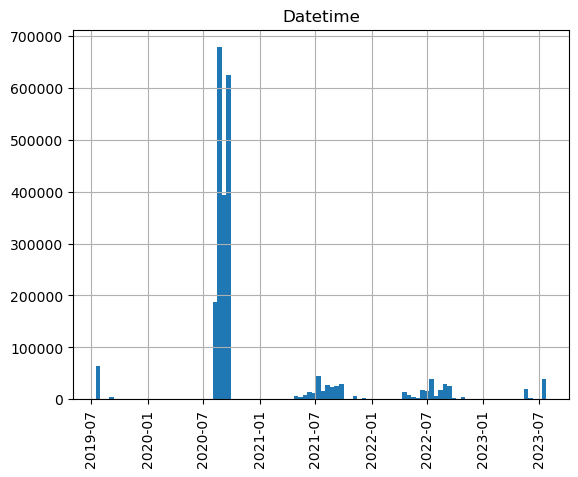

In [92]:
df.hist(column='Datetime', bins=100, xrot=90)

In [186]:
# merging and keeping only image names that are unpacked
# df_unp = df[df.image_name.isin(df_imgs.image_name)]
# df_unp = pd.merge(df, df_imgs, on="image_name")
# df_unp.to_pickle("2019-2023\\2019-2023_unpacked_imgs_headers.pickle")
# print(df_unp.shape) # (597986, 87) (598786, 87) (599180, 90)

df_unp = pd.read_pickle("2019-2023\\2019-2023_unpacked_imgs_headers.pickle")
print(df_unp.columns)
print(df_unp.shape) # (599180, 90)

Index(['image_name', 'Heading_D', 'Pitch_D', 'Roll_D', 'Temp_C', 'AUV_depth_m',
       'Alt_m', 'Salinity_ppt', 'Speed_kn', 'Lat_DD', 'Long_DD',
       'CreationTime', 'EpochTime', 'F Stop', 'Shutter Speed', 'Depth (ft)',
       'Altitude (ft)', 'Epoch Time (s)', 'Upper 5 Intensity',
       'Upper 6 Intensity', 'Upper 7 Intensity', 'Upper 8 Intensity',
       'Upper 9 Intensity', 'Upper 10 Intensity', 'Upper 11 Intensity',
       'Upper 12 Intensity', 'Upper 13 Intensity', 'Upper 14 Intensity',
       'Upper 15 Intensity', 'Lower 4 Intensity', 'Lower 5 Intensity',
       'Lower 6 Intensity', 'Upper 5 Blue-Green Intensity',
       'Upper 6 Blue-Green Intensity', 'Upper 7 Blue-Green Intensity',
       'Upper 8 Blue-Green Intensity', 'Upper 9 Blue-Green Intensity',
       'Upper 10 Blue-Green Intensity', 'Upper 11 Blue-Green Intensity',
       'Upper 12 Blue-Green Intensity', 'Upper 13 Blue-Green Intensity',
       'Upper 14 Blue-Green Intensity', 'Upper 15 Blue-Green Intensity',
       '

array([[<Axes: title={'center': 'Datetime'}>]], dtype=object)

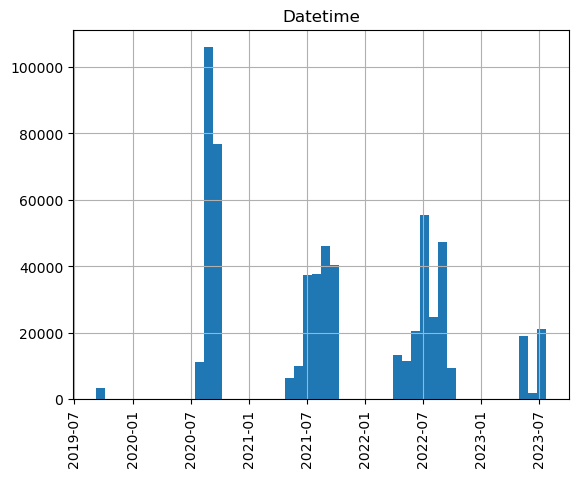

In [183]:
df_unp.hist(column='Datetime', bins=50, xrot=90)

In [187]:
## Removing unused columns

df_unp = df_unp[['image_name', 'Heading_D', 'Pitch_D', 'Roll_D', 'Temp_C', 'AUV_depth_m',
       'Alt_m', 'Salinity_ppt', 'Speed_kn', 'Lat_DD', 'Long_DD','EpochTime', 'INS - Altitude', 
       'Speed_mps','Datetime', 'image_path']]
df_unp = df_unp.sort_values(by="Datetime")

## Cleaning lat lon columns
idx_bad_lat = df_unp[(df_unp['Lat_DD'] < 41) | (df_unp['Lat_DD'] > 50)].index
idx_bad_lon = df_unp[(df_unp['Long_DD'] < -92.5) | (df_unp['Long_DD'] > -75.5)].index
df_unp.loc[idx_bad_lat, 'Lat_DD'] = np.nan
df_unp.loc[idx_bad_lon, 'Long_DD'] = np.nan

print(df_unp.columns)
print(df_unp.shape) # (598786, 18) (599180, 18)


Index(['image_name', 'Heading_D', 'Pitch_D', 'Roll_D', 'Temp_C', 'AUV_depth_m',
       'Alt_m', 'Salinity_ppt', 'Speed_kn', 'Lat_DD', 'Long_DD', 'EpochTime',
       'INS - Altitude', 'Speed_mps', 'Datetime', 'image_path'],
      dtype='object')
(599180, 16)


In [196]:
# df_unp[df_unp.Long_DD.isna()].to_csv('bat_latlon.csv')
df_unp.Long_DD.describe()
df_unp.Lat_DD.describe()
df_unp.Long_DD.isna().sum()
df_unp.Lat_DD.isna().sum()

3714

In [203]:
## Here I add collect ID, AUV ID, and camera system columns

df_unp['collect_id'] = df_unp["image_path"].str.extract(r'([0-9]{8}_[0-9]{3}_[a-z,A-Z]+[0-9][0-9][0-9][0-9]_[a-z,A-Z]+[0-2])')
df_unp['AUV'] = df_unp["image_path"].str.extract(       r'[0-9]{8}_[0-9]{3}_([a-z,A-Z]+[0-9][0-9][0-9][0-9])_[a-z,A-Z]+[0-2]')
df_unp['cam_sys'] = df_unp["image_path"].str.extract(    r'[0-9]{8}_[0-9]{3}_[a-z,A-Z]+[0-9][0-9][0-9][0-9]_([a-z,A-Z]+[0-2])')
index_2019_2021 = df_unp[(df_unp.Datetime > "01-01-2019") & (df_unp.Datetime < "12-25-2021")].index
df_unp.loc[index_2019_2021,'AUV'] = "Iver3069"
df_unp.loc[index_2019_2021,'cam_sys'] = "ABS1"
print(df_unp.shape) # (599180, 19)

df_unp.to_csv("all_unpacked_images.csv")

(599180, 19)


In [50]:
## Experimental: Combining with all collects dataframe if we want collect paths

# df_collects = pd.read_csv('collects_lat_lon.csv')[['collect_path', 'collect_id', 'date', 'collect', 'Iver_num',	'cam_sys']]
# dtf = lambda d: datetime.datetime.strptime(d, "%Y%m%d")
# df_collects['date'] = df_collects['date'].astype('str')
# df_collects['date'] = df_collects['date'].map(dtf)
# df_collects = df_collects.sort_values(by="date")
# df_all = pd.merge_asof(df_unp,df_collects, left_on="Datetime", right_on="date")
# print(df_all.shape) # (598786, 24) (599180, 24)
# # df_all.head()
# df_all[(df_all.Datetime > "01-01-2019") & (df_all.Datetime < "12-25-2019")].to_csv("test2019.csv")

In [204]:
df_unp = pd.read_csv('all_unpacked_images.csv')
## Getting indexes of Camera system, lens, etc
is2019 = (df_unp['Datetime'] > "2018-12-31") & (df_unp['Datetime'] <= "2019-12-31")
is2020 = (df_unp['Datetime'] > "2019-12-31") & (df_unp['Datetime'] <= "2020-12-31")
is2021 = (df_unp['Datetime'] > "2020-12-31") & (df_unp['Datetime'] <= "2021-12-31")
is2022 = (df_unp['Datetime'] > "2021-12-31") & (df_unp['Datetime'] <= "2022-12-31")
is2023 = (df_unp['Datetime'] > "2022-12-31") & (df_unp['Datetime'] <= "2023-12-31")

## for Iver3069
is2021_after0512 = (df_unp['Datetime'] > "2021-05-12") & (df_unp['Datetime'] <= "2021-12-31")
is2022_prior0716 = (df_unp['Datetime'] > "2021-12-31") & (df_unp['Datetime'] <= "2022-07-15")
is2022_0720t0809 = (df_unp['Datetime'] > "2022-07-19") & (df_unp['Datetime'] <= "2022-08-09")
is2022_0810t0814 = (df_unp['Datetime'] > "2022-08-09") & (df_unp['Datetime'] <= "2022-08-14")
is2022_0815t0818 = (df_unp['Datetime'] > "2022-08-14") & (df_unp['Datetime'] <= "2022-08-18")
is2022_0819t0822 = (df_unp['Datetime'] > "2022-08-18") & (df_unp['Datetime'] <= "2022-08-22")
is2022_after0822 = (df_unp['Datetime'] > "2022-08-22") & (df_unp['Datetime'] <= "2022-08-18")

is2023_after0809 = (df_unp['Datetime'] > "2023-08-08") & (df_unp['Datetime'] <= "2022-12-31")

## for Iver3098
is2022_0705t0810 = (df_unp['Datetime'] > "2022-07-05") & (df_unp['Datetime'] <= "2022-08-10")
is2022_0811t0819 = (df_unp['Datetime'] > "2022-08-10") & (df_unp['Datetime'] <= "2022-08-19")
is2022_after0819 = (df_unp['Datetime'] > "2022-08-19") & (df_unp['Datetime'] <= "2022-12-31")

is2023_0427t0522 = (df_unp['Datetime'] > "2023-04-27") & (df_unp['Datetime'] <= "2023-05-22")
is2023_0523t0711 = (df_unp['Datetime'] > "2023-05-22") & (df_unp['Datetime'] <= "2023-07-11")
is2023_0712t0808 = (df_unp['Datetime'] > "2023-07-11") & (df_unp['Datetime'] <= "2023-08-08")
is2023_after0808 = (df_unp['Datetime'] > "2023-08-08") & (df_unp['Datetime'] <= "2023-12-31")

is3069 = (df_unp['AUV']=="Iver3069")
is3098 = (df_unp['AUV']=="Iver3098")
isABS1 = (df_unp['cam_sys']=="ABS1")
isABS2 = (df_unp['cam_sys']=="ABS2")

group_01  = df_unp[is2019 & isABS1 & is3069].index
group_02 =  df_unp[is2020 & isABS1 & is3069].index
group_03 =  df_unp[is2021_after0512 & isABS1 & is3069].index
group_04 =  df_unp[is2022_prior0716 & isABS1 & is3069].index
group_05 =  df_unp[is2022_0705t0810 & isABS2 & is3098].index
group_06 =  df_unp[is2022_0720t0809 & isABS2 & is3069].index
group_07 =  df_unp[is2022_0810t0814 & is2022_0819t0822 & isABS2 & is3069].index
group_08 =  df_unp[is2022_0811t0819 & isABS2 & is3098].index
group_09 =  df_unp[is2022_0815t0818 & isABS2 & is3069].index
group_10 =  df_unp[is2022_after0819 & isABS2 & is3098].index
group_11 =  df_unp[is2022_after0822 & isABS2 & is3069].index
group_12 =  df_unp[is2023_0427t0522 & isABS2 & is3098].index
group_13 =  df_unp[is2023_0523t0711 & isABS2 & is3098].index
group_14 =  df_unp[is2023_0712t0808 & isABS2 & is3098].index
group_15 =  df_unp[is2023_after0808 & isABS2 & is3069].index



C:\Users\ageglio\AppData\Local\Temp\3\ipykernel_20124\2861365695.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unp = pd.read_csv('all_unpacked_images.csv')


In [202]:
groups = [group_01, group_02, group_03, group_04, group_05, 
          group_06, group_07, group_08, group_09, group_10, 
          group_11, group_12, group_13, group_14, group_15]
for group in groups:
    print(len(group))

3363
193971
174036
74222
27144
10446
0
9417
769
17852
0
1785
19168
21031
0


In [205]:
groups = [group_01, group_02, group_03, group_04, group_05, 
          group_06, group_07, group_08, group_09, group_10, 
          group_11, group_12, group_13, group_14, group_15]
for group in groups:
    print(len(group))

3363
193971
174036
74222
27144
10446
0
9417
769
17852
0
1785
19168
21031
0
